<a href="https://colab.research.google.com/github/reubenwenisch/Transformer/blob/main/spacial_transformer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Spatial Transformer Networks

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
# !git clone https://github.com/reubenwenisch/Transformer.git

In [3]:
cd '/content/gdrive/MyDrive/Learn/Transformer'

/content/gdrive/MyDrive/Learn/Transformer


### Import

In [4]:
# License: BSD
# Author: Ghassen Hamrouni

from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np

plt.ion()   # interactive mode

### Loading the data

In [5]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Training dataset
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST(root='.', train=True, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ])), batch_size=64, shuffle=True, num_workers=4)
# Test dataset
test_loader = torch.utils.data.DataLoader(
    datasets.MNIST(root='.', train=False, transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
    ])), batch_size=64, shuffle=True, num_workers=4)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [6]:
from model import Net

model = Net().to(device)

### Training the model

In [8]:
from main import train, test

optimizer = optim.SGD(model.parameters(), lr=0.01)

for epoch in range(1, 50 + 1):
    train(epoch, model, optimizer, train_loader, device)
    test(model, test_loader, device)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:4066: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  "Default grid_sample and affine_grid behavior has changed "
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:4004: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify ali

Train Epoch: 1 [0/60000 (0%)]	Loss: 0.204099
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.509506


/usr/local/lib/python3.7/dist-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))



Test set: Average loss: 0.0835, Accuracy: 9750/10000 (98%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.160442
Train Epoch: 2 [32000/60000 (53%)]	Loss: 0.218152

Test set: Average loss: 0.0816, Accuracy: 9735/10000 (97%)

Train Epoch: 3 [0/60000 (0%)]	Loss: 0.128171
Train Epoch: 3 [32000/60000 (53%)]	Loss: 0.111586

Test set: Average loss: 0.0641, Accuracy: 9794/10000 (98%)

Train Epoch: 4 [0/60000 (0%)]	Loss: 0.072463
Train Epoch: 4 [32000/60000 (53%)]	Loss: 0.449378

Test set: Average loss: 0.1268, Accuracy: 9619/10000 (96%)

Train Epoch: 5 [0/60000 (0%)]	Loss: 0.207265
Train Epoch: 5 [32000/60000 (53%)]	Loss: 0.031299

Test set: Average loss: 0.0540, Accuracy: 9825/10000 (98%)

Train Epoch: 6 [0/60000 (0%)]	Loss: 0.072206
Train Epoch: 6 [32000/60000 (53%)]	Loss: 0.205485

Test set: Average loss: 0.0850, Accuracy: 9744/10000 (97%)

Train Epoch: 7 [0/60000 (0%)]	Loss: 0.131919
Train Epoch: 7 [32000/60000 (53%)]	Loss: 0.053527

Test set: Average loss: 0.0523, Accuracy: 9846/10000 (98%)

Tra

### Visualizing the STN results

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:4066: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  "Default grid_sample and affine_grid behavior has changed "
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:4004: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify ali

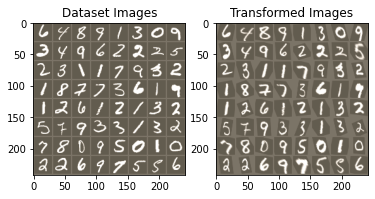

In [10]:
from utils import visualize_stn

# Visualize the STN transformation on some input batch
visualize_stn(model, test_loader, device)
plt.ioff()
plt.show()